# Modelos de clasificación

## Importación de biblotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
from IPython.display import display, Markdown, Latex

warnings.filterwarnings("ignore")

## Lectura de datos

In [2]:
# carga de datos de cáncer
cancer = datasets.load_breast_cancer()
X = cancer.data  # Atributos
y = cancer.target  # Etiquetas

columns = cancer["feature_names"]
target = cancer["target_names"]

In [3]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
target = cancer["target_names"]

# Logistic Regression

Puntaje: 0.9473684210526315
Exactitud: 0.9473684210526315

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        47
           1       0.97      0.94      0.95        67

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

Matriz de confusión:


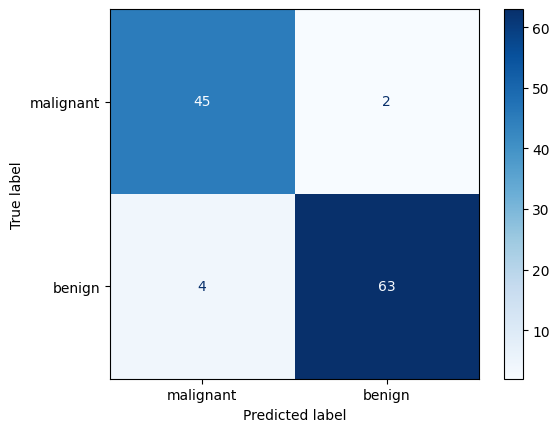

In [4]:
X = cancer_df.drop(columns="target")
y = cancer_df["target"]

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Instancia y entrenamiento del modelo
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)

# Predicciones con los datos de prueba
y_pred = logistic_regression.predict(X_test)

# Evaluación del modelo con las métricas de rendimiento
score_default = logistic_regression.score(X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_ = confusion_matrix(y_test, y_pred)
classification_report_ = classification_report(y_test, y_pred)

# Se imprime los resultados de las métricas
print(f"Puntaje: {score_default}")
print(f"Exactitud: {accuracy}\n")

# Se imprime el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report_)

# Se imprime la matriz de confusión
print("Matriz de confusión:")
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = target)
cm_display.plot(cmap='Blues')
plt.show()

## Coeficiente (b) and intercepto (b0)

In [5]:
logistic_regression.coef_

array([[ 1.55436158,  0.29223923,  0.05561434, -0.00362337, -0.0628678 ,
        -0.29609818, -0.40120297, -0.16661329, -0.11597615, -0.01942467,
         0.08451732,  0.62364299,  0.41171968, -0.12988159, -0.0036755 ,
        -0.06392498, -0.08713256, -0.02032699, -0.02478523, -0.00540995,
         1.69998862, -0.40717719, -0.24535204, -0.02235397, -0.10952056,
        -0.95149344, -1.18977324, -0.33221704, -0.32178196, -0.09654658]])

In [6]:
# Se imprime el coeficiente (b) and intercepto (b0)
coef = logistic_regression.coef_
intercept = logistic_regression.intercept_

# Se imprime los valores de los coeficientes
for coef_, value in zip(coef[0], columns):
  print(f"Variable: {value} | Valor: {coef_:.5f}")

# Se transforma el valor absoluto de los coeficientes
absolute_coefs = np.abs(logistic_regression.coef_)

# Se busca el valor con mayor importancia
most_significant_feature_index = np.argmax(absolute_coefs)

# Se obtiene el nombre del atributo con mayor importancia
most_significant_feature = columns[most_significant_feature_index]

# Se imprime los atributos más significativos
print(f"\nEl atributo más significativo es: {most_significant_feature} | Valor: {coef[0][most_significant_feature_index]:0.3f}")

Variable: mean radius | Valor: 1.55436
Variable: mean texture | Valor: 0.29224
Variable: mean perimeter | Valor: 0.05561
Variable: mean area | Valor: -0.00362
Variable: mean smoothness | Valor: -0.06287
Variable: mean compactness | Valor: -0.29610
Variable: mean concavity | Valor: -0.40120
Variable: mean concave points | Valor: -0.16661
Variable: mean symmetry | Valor: -0.11598
Variable: mean fractal dimension | Valor: -0.01942
Variable: radius error | Valor: 0.08452
Variable: texture error | Valor: 0.62364
Variable: perimeter error | Valor: 0.41172
Variable: area error | Valor: -0.12988
Variable: smoothness error | Valor: -0.00368
Variable: compactness error | Valor: -0.06392
Variable: concavity error | Valor: -0.08713
Variable: concave points error | Valor: -0.02033
Variable: symmetry error | Valor: -0.02479
Variable: fractal dimension error | Valor: -0.00541
Variable: worst radius | Valor: 1.69999
Variable: worst texture | Valor: -0.40718
Variable: worst perimeter | Valor: -0.24535


## Descripción de predicción

In [7]:
sample_1 = X.iloc[75]
display(sample_1.to_frame().T)
sample_1_prediction = logistic_regression.predict([sample_1])[0]
sample_1_proba = logistic_regression.predict_proba([sample_1])[0]
print(f"Predicción: {sample_1_prediction} | Probabilidad: {[f'{i:.7f}' for i in sample_1_proba]}\n\n")

sample_2 = X.iloc[75].copy()
sample_2["worst radius"] = 26.7
display(sample_2.to_frame().T)
sample_2_prediction = logistic_regression.predict([sample_2])[0]
sample_2_proba = logistic_regression.predict_proba([sample_2])[0]
print(f"Predicción: {sample_2_prediction} | Probabilidad: {[f'{i:.7f}' for i in sample_2_proba]}\n\n")

sample_3 = X.iloc[75].copy()
sample_3["mean perimeter"] = 1
display(sample_3.to_frame().T)
sample_3_prediction = logistic_regression.predict([sample_3])[0]
sample_3_proba = logistic_regression.predict_proba([sample_3])[0]
print(f"Predicción: {sample_3_prediction} | Probabilidad: {[f'{i:.7f}' for i in sample_3_proba]}\n\n")

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
75,16.07,19.65,104.1,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,19.77,24.56,128.8,1223.0,0.15,0.2045,0.2829,0.152,0.265,0.06387


Predicción: 0 | Probabilidad: ['0.9999446', '0.0000554']




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
75,16.07,19.65,104.1,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,26.7,24.56,128.8,1223.0,0.15,0.2045,0.2829,0.152,0.265,0.06387


Predicción: 1 | Probabilidad: ['0.1212470', '0.8787530']




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
75,16.07,19.65,1.0,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,19.77,24.56,128.8,1223.0,0.15,0.2045,0.2829,0.152,0.265,0.06387


Predicción: 0 | Probabilidad: ['0.9999998', '0.0000002']




## Punto de corte

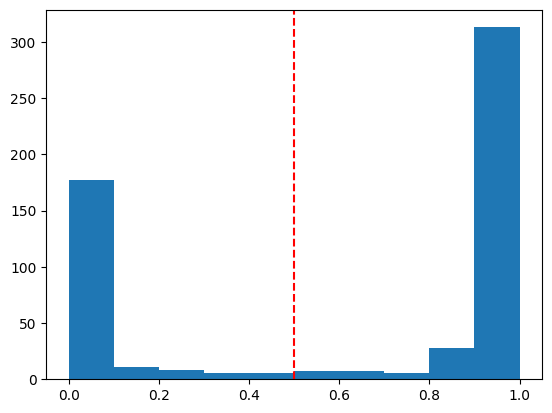

In [8]:
list_proba = logistic_regression.predict_proba(X)
plt.hist(list_proba[:,1])
plt.axvline(x=0.5, color="red", ls="--")
plt.show()

In [9]:
def change_threshold(data, threshold=0.5):
  display(data.to_frame().T)
  sample_prediction = logistic_regression.predict([data])[0]
  sample_proba = logistic_regression.predict_proba([data])[0]

  # Se cambia el punto de corte y se realiza el proceso de predicciones
  threshold = threshold
  print(f'Predicción con el punto de corte {threshold}: {sample_proba}')
  y_pred_new_threshold = (sample_proba[1] >= threshold).astype(int)
  print(f"Preficción: {y_pred_new_threshold} | Valor Original: {sample_prediction}")
  print()

sample = X.iloc[255]
change_threshold(data=sample, threshold=0.25)

sample = sample_2.copy()
change_threshold(data=sample, threshold=0.75)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
255,13.96,17.05,91.43,602.4,0.1096,0.1279,0.09789,0.05246,0.1908,0.0613,...,16.39,22.07,108.1,826.0,0.1512,0.3262,0.3209,0.1374,0.3068,0.07957


Predicción con el punto de corte 0.25: [0.56157303 0.43842697]
Preficción: 1 | Valor Original: 0



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
75,16.07,19.65,104.1,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,26.7,24.56,128.8,1223.0,0.15,0.2045,0.2829,0.152,0.265,0.06387


Predicción con el punto de corte 0.75: [0.12124699 0.87875301]
Preficción: 1 | Valor Original: 1



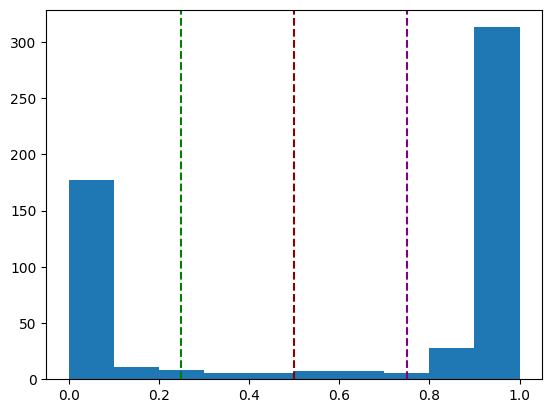

In [10]:
plt.hist(list_proba[:,1])
plt.axvline(x=0.25, color="green", ls="--")
plt.axvline(x=0.5, color="darkred", ls="--")
plt.axvline(x=0.75, color="purple", ls="--")
plt.show()

In [11]:
import pandas as pd
from sklearn import neighbors
from mlxtend.plotting import plot_decision_regions

Puntaje: 0.9385964912280702
Exactitud: 0.9385964912280702

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        47
           1       0.95      0.94      0.95        67

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

Matriz de confusión:


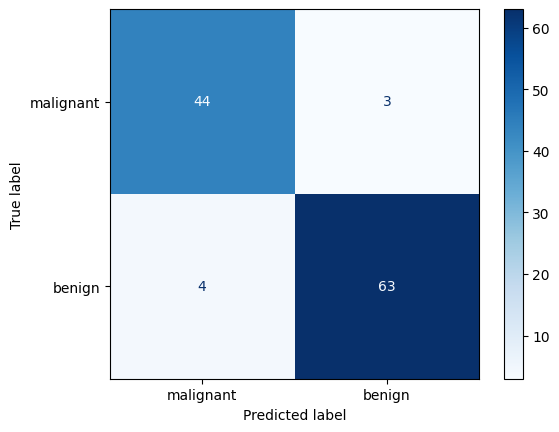

In [12]:
X = cancer_df.drop(columns="target")
y = cancer_df["target"]

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Instancia y entrenamiento del modelo
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

# Predicciones con los datos de prueba
y_pred = knn.predict(X_test)

# Evaluación del modelo con las métricas de rendimiento
score_default = knn.score(X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_ = confusion_matrix(y_test, y_pred)
classification_report_ = classification_report(y_test, y_pred)

# Se imprime los resultados de las métricas
print(f"Puntaje: {score_default}")
print(f"Exactitud: {accuracy}\n")

# Se imprime el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report_)

# Se imprime la matriz de confusión
print("Matriz de confusión:")
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = target)
cm_display.plot(cmap='Blues')
plt.show()

Matriz de confusión con punto de corte 0.5:
Exactitud: 95.08%


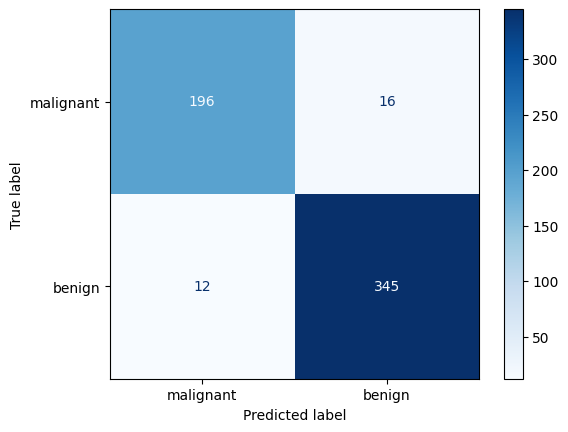


Matriz de confusión con punto de corte 0.25:
Exactitud: 94.90%


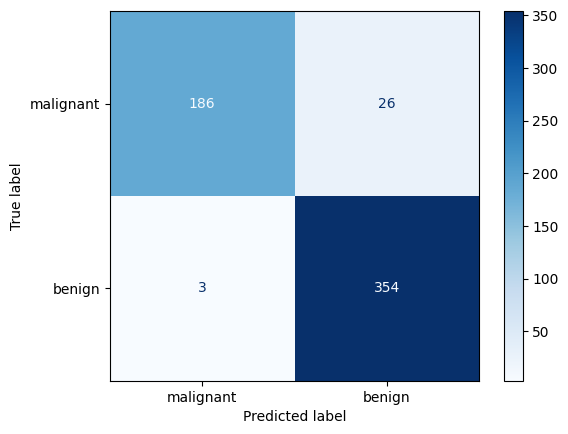


Matriz de confusión con punto de corte 0.75:
Exactitud: 95.78%


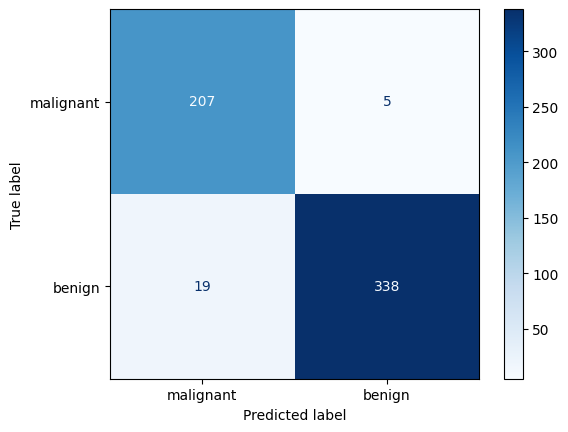

In [13]:
def confusion_matrix_change(data_x, data_y, threshold=0.5):
  y_pred_proba = logistic_regression.predict_proba(data_x)
  y_pred_proba = [proba[1] >= threshold for proba in y_pred_proba]

  confusion_matrix_ = confusion_matrix(data_y, y_pred_proba)
  accuracy = accuracy_score(data_y, y_pred_proba)

  print(f"Matriz de confusión con punto de corte {threshold}:")
  print(f"Exactitud: {accuracy*100:.2f}%")
  cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = target)
  cm_display.plot(cmap='Blues')
  plt.show()
  print()

confusion_matrix_change(data_x=X, data_y=y, threshold=0.5)
confusion_matrix_change(data_x=X, data_y=y, threshold=0.25)
confusion_matrix_change(data_x=X, data_y=y, threshold=0.75)

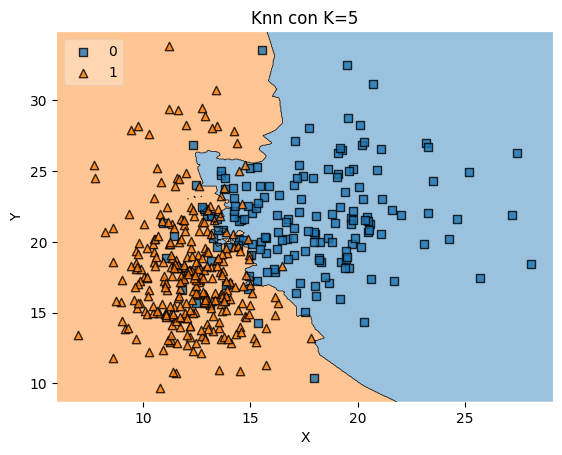

In [14]:
def knn_(x, y, k):
  x = x.values[:,:2]
  y = y.values
  clf = neighbors.KNeighborsClassifier(n_neighbors=k)
  clf.fit(x, y)
  # Graficando las áreas de decisión
  plot_decision_regions(x, y, clf=clf, legend=2)

  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Knn con K='+ str(k))
  plt.show()

  return clf

knn_model = knn_(X_train, y_train, 5)

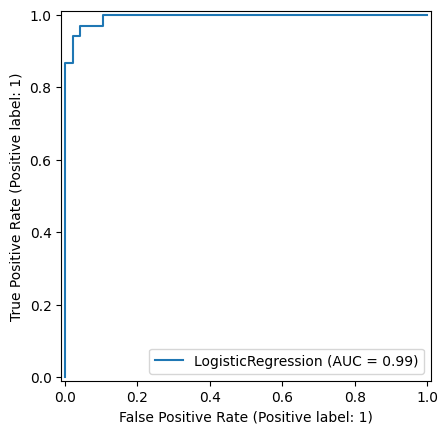

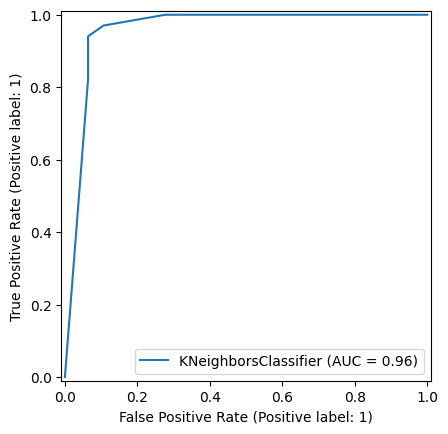

In [15]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(logistic_regression ,X_test ,y_test)
RocCurveDisplay.from_estimator(knn ,X_test, y_test)
# RocCurveDisplay.from_estimator(svm, X_test, y_test)RocCurveDisplay

In [16]:
str(logistic_regression.__class__).split(".")[-1]

"LogisticRegression'>"

In [17]:
def plot_roc(model, x, y):
  y_pred = model.predict(x)
  fpr, tpr, thresh = roc_curve(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  name = model.__str__().replace("()", "")
  plt.plot(fpr,tpr,label=f"{name}, auc={auc*100:.2f}%")

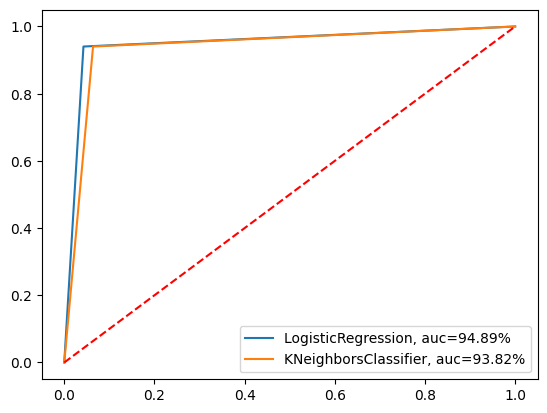

In [18]:
plot_roc(logistic_regression, X_test, y_test)
plot_roc(knn, X_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=0)

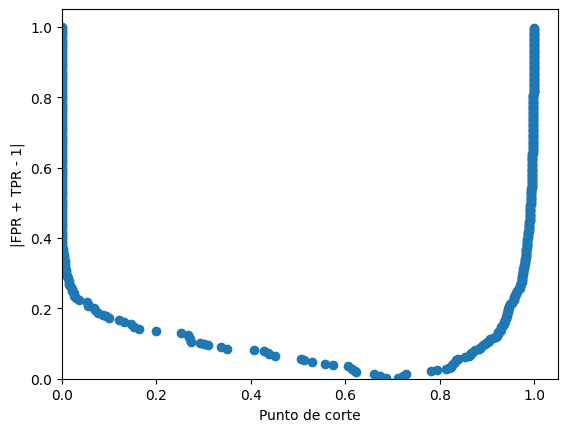

In [19]:
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_train, logistic_regression.predict_proba(X_train)[:,1],drop_intermediate=False)
plt.scatter(thresholds,np.abs(fpr+tpr-1))
plt.xlabel("Punto de corte")
plt.ylabel("|FPR + TPR - 1|")
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.show()

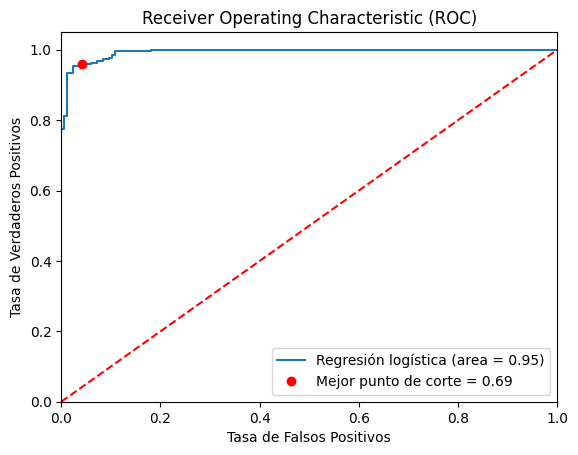

In [20]:
o_tpr = tpr[np.argmin(np.abs(fpr+tpr-1))]
o_fpr = fpr[np.argmin(np.abs(fpr+tpr-1))]
o_threshold = thresholds[np.argmin(np.abs(fpr+tpr-1))]
plt.figure()
plt.plot(fpr, tpr, label='Regresión logística (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(o_fpr, o_tpr, 'ro', label='Mejor punto de corte = %0.2f' % o_threshold)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

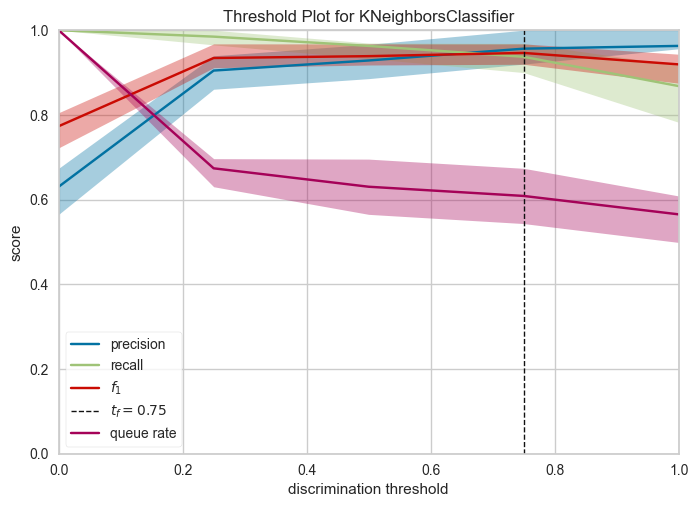

In [21]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(knn, quantiles=np.array([0.25, 0.5, 0.75]))

visualizer.fit(X_train, y_train)
visualizer.show();